<a href="https://www.kaggle.com/code/vijays140291/loan-default141?scriptVersionId=194099701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [160]:
#importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [100]:
#loading the dataset
df=pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz',compression='gzip')

/tmp/ipykernel_36/1546706361.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz',compression='gzip')


In [101]:
# removing the half of the data
df=df.sample(frac=0.5,axis=0,random_state=42).reset_index(drop=True)

In [102]:
#loading the dataset
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,8581088,NaN,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130346,5646193,NaN,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130347,9294954,NaN,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130348,59249382,NaN,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#checking for missing valuesd
df=df.drop(df.loc[:,df.isna().mean()>0.30].columns,axis=1)


In [104]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,39651438,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,Public Service,...,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,16411620,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,NaN,...,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,45122316,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,System Analyst,...,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,125356772,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,Admin assistant,...,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,128490686,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,Coordinator,...,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,8581088,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,C3,Loan Officer,...,50.0,0.0,0.0,355441.0,47127.0,41800.0,15241.0,N,Cash,N
1130346,5646193,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,C5,Albert Restaurant Group,...,100.0,0.0,0.0,279063.0,56961.0,3600.0,46901.0,N,Cash,N
1130347,9294954,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,D2,manager,...,0.0,0.0,0.0,149577.0,46878.0,20800.0,45490.0,N,Cash,N
1130348,59249382,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,C5,Custodian,...,0.0,0.0,0.0,169570.0,26843.0,3200.0,0.0,N,Cash,N


In [105]:
df=df.reset_index(drop=True)

In [106]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,39651438,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,Public Service,...,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,16411620,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,NaN,...,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,45122316,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,System Analyst,...,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,125356772,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,Admin assistant,...,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,128490686,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,Coordinator,...,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,8581088,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,C3,Loan Officer,...,50.0,0.0,0.0,355441.0,47127.0,41800.0,15241.0,N,Cash,N
1130346,5646193,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,C5,Albert Restaurant Group,...,100.0,0.0,0.0,279063.0,56961.0,3600.0,46901.0,N,Cash,N
1130347,9294954,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,D2,manager,...,0.0,0.0,0.0,149577.0,46878.0,20800.0,45490.0,N,Cash,N
1130348,59249382,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,C5,Custodian,...,0.0,0.0,0.0,169570.0,26843.0,3200.0,0.0,N,Cash,N


In [107]:
df.isna().sum()

id                                0
loan_amnt                        19
funded_amnt                      19
funded_amnt_inv                  19
term                             19
                              ...  
total_bc_limit                25019
total_il_high_credit_limit    35108
hardship_flag                    19
disbursement_method              19
debt_settlement_flag             19
Length: 93, dtype: int64

In [108]:
unneeded_columns=['id','sub_grade','emp_title','url','title','zip_code']

In [109]:
{column:list(df[column].unique()) for column in df.drop(unneeded_columns,axis=1).columns if df[column].dtypes=='object'}

{'term': [' 60 months', ' 36 months', nan],
 'grade': ['B', 'C', 'A', 'E', 'D', 'F', 'G', nan],
 'emp_length': ['10+ years',
  nan,
  '4 years',
  '5 years',
  '8 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '9 years',
  '6 years',
  '3 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER', nan],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified', nan],
 'issue_d': ['Feb-2015',
  'May-2014',
  'Apr-2015',
  'Dec-2017',
  'Feb-2018',
  'Aug-2016',
  'Oct-2016',
  'Jul-2017',
  'Jan-2018',
  'Jan-2015',
  'Sep-2014',
  'May-2015',
  'Apr-2016',
  'Sep-2016',
  'Oct-2017',
  'Mar-2016',
  'Jun-2015',
  'Jun-2013',
  'Oct-2013',
  'May-2018',
  'Jan-2013',
  'Jan-2017',
  'Nov-2018',
  'Jul-2014',
  'Sep-2018',
  'Mar-2015',
  'Jun-2018',
  'Aug-2017',
  'Oct-2015',
  'Jul-2016',
  'Aug-2018',
  'Aug-2015',
  'Sep-2015',
  'Feb-2017',
  'Mar-2017',
  'Dec-2018',
  'Mar-2018',
  'Nov-2014',
  'Jul-2018',
  'Oct-2011',
  'Mar-2013

In [110]:
df=df.drop(unneeded_columns,axis=1)

In [111]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,...,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,NaN,RENT,21900.0,...,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,4 years,MORTGAGE,83000.0,...,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,...,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,...,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,3 years,MORTGAGE,72000.0,...,50.0,0.0,0.0,355441.0,47127.0,41800.0,15241.0,N,Cash,N
1130346,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,10+ years,MORTGAGE,98000.0,...,100.0,0.0,0.0,279063.0,56961.0,3600.0,46901.0,N,Cash,N
1130347,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,7 years,MORTGAGE,49000.0,...,0.0,0.0,0.0,149577.0,46878.0,20800.0,45490.0,N,Cash,N
1130348,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,7 years,MORTGAGE,37000.0,...,0.0,0.0,0.0,169570.0,26843.0,3200.0,0.0,N,Cash,N


In [112]:
date_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [113]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,...,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,NaN,RENT,21900.0,...,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,4 years,MORTGAGE,83000.0,...,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,...,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,...,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,3 years,MORTGAGE,72000.0,...,50.0,0.0,0.0,355441.0,47127.0,41800.0,15241.0,N,Cash,N
1130346,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,10+ years,MORTGAGE,98000.0,...,100.0,0.0,0.0,279063.0,56961.0,3600.0,46901.0,N,Cash,N
1130347,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,7 years,MORTGAGE,49000.0,...,0.0,0.0,0.0,149577.0,46878.0,20800.0,45490.0,N,Cash,N
1130348,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,7 years,MORTGAGE,37000.0,...,0.0,0.0,0.0,169570.0,26843.0,3200.0,0.0,N,Cash,N


In [114]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,...,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,NaN,RENT,21900.0,...,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,4 years,MORTGAGE,83000.0,...,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,...,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,...,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,3 years,MORTGAGE,72000.0,...,50.0,0.0,0.0,355441.0,47127.0,41800.0,15241.0,N,Cash,N
1130346,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,10+ years,MORTGAGE,98000.0,...,100.0,0.0,0.0,279063.0,56961.0,3600.0,46901.0,N,Cash,N
1130347,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,7 years,MORTGAGE,49000.0,...,0.0,0.0,0.0,149577.0,46878.0,20800.0,45490.0,N,Cash,N
1130348,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,7 years,MORTGAGE,37000.0,...,0.0,0.0,0.0,169570.0,26843.0,3200.0,0.0,N,Cash,N


In [115]:
df.dropna(axis=0,inplace=True)

In [116]:
df['issue_d'].isna().sum()

0

In [117]:
for column in date_columns:
    df[column+'_month']=df[column].apply(lambda x:x[0:3])
    df[column+'_year']=df[column].apply(lambda x:x[-4:])

In [118]:
df=df.drop(date_columns,axis=1)

In [119]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,...,Cash,N,Feb,2015,Oct,1981,Mar,2019,Mar,2019
3,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,...,Cash,N,Dec,2017,Jun,2005,Oct,2018,Oct,2018
4,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,...,Cash,N,Feb,2018,Jul,1999,Mar,2019,Mar,2019
5,20000.0,20000.0,20000.0,36 months,9.49,640.57,B,10+ years,MORTGAGE,100000.0,...,Cash,N,Aug,2016,Aug,1990,Sep,2017,Mar,2019
7,24575.0,24575.0,24575.0,60 months,14.49,578.08,C,5 years,RENT,120000.0,...,Cash,N,Aug,2016,Feb,2007,Jul,2018,Mar,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130344,35000.0,35000.0,35000.0,36 months,15.31,1218.61,C,10+ years,MORTGAGE,70000.0,...,Cash,N,May,2016,Mar,2003,Mar,2019,Mar,2019
1130346,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,10+ years,MORTGAGE,98000.0,...,Cash,N,Jun,2013,Aug,2002,Sep,2013,Sep,2013
1130347,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,7 years,MORTGAGE,49000.0,...,Cash,N,Dec,2013,Jun,2007,Aug,2015,Mar,2019
1130348,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,7 years,MORTGAGE,37000.0,...,Cash,N,Aug,2015,Jan,2004,Aug,2018,Nov,2018


In [120]:
month_ordering=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [121]:
for column in date_columns:
    df[column+'_month']=df[column+'_month'].apply(lambda x:month_ordering.index(x))

In [122]:
for column in date_columns:
    df[column+'_year']=df[column+'_year'].apply(lambda x:int(x))

In [123]:
df[[column for column in df.columns if df[column].dtype=='object']]

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,60 months,B,10+ years,MORTGAGE,Verified,Current,n,debt_consolidation,CA,w,Individual,N,Cash,N
3,36 months,B,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,MA,w,Individual,N,Cash,N
4,60 months,E,10+ years,OWN,Verified,Current,n,debt_consolidation,CA,w,Individual,N,Cash,N
5,36 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,n,debt_consolidation,NV,w,Individual,N,Cash,N
7,60 months,C,5 years,RENT,Source Verified,Fully Paid,n,credit_card,CA,w,Individual,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130344,36 months,C,10+ years,MORTGAGE,Verified,Current,n,debt_consolidation,TX,w,Individual,N,Cash,N
1130346,36 months,C,10+ years,MORTGAGE,Not Verified,Fully Paid,n,home_improvement,TX,w,Individual,N,Cash,N
1130347,60 months,D,7 years,MORTGAGE,Verified,Charged Off,n,home_improvement,FL,f,Individual,N,Cash,N
1130348,36 months,C,7 years,MORTGAGE,Source Verified,Fully Paid,n,home_improvement,PA,f,Individual,N,Cash,N


In [124]:
{column:list(df[column].unique()) for column in df.columns if df[column].dtype=='object'}

{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'loan_status': ['Current',
  'Fully Paid',
  'Charged Off',
  'Late (31-120 days)',
  'Late (16-30 days)',
  'In Grace Period',
  'Default'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'credit_card',
  'house',
  'small_business',
  'major_purchase',
  'home_improvement',
  'other',
  'medical',
  'car',
  'renewable_energy',
  'moving',
  'vacation',
  'wedding',
  'educational'],
 'addr_state': ['CA',
  'MA',
  'NV',
  'OH',
  'FL',
  'MI',
  'IN',
  'ID',
  'PA',
  'TX',
  'OR',
  'NY',
  'GA',
  'VA',
  'TN',
  'AL',
  'MD',
  'KY',
  'MN',
  'CO',
  'WY',
  'LA',
  'NJ',
  'A

In [125]:
df['term']=df['term'].replace({' 60 months':1, ' 36 months':0})

/tmp/ipykernel_36/2724414048.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['term']=df['term'].replace({' 60 months':1, ' 36 months':0})


In [126]:
emp_length_ordering={'< 1 year':0,'1 year':1, '2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}

In [127]:
df['emp_length']=df['emp_length'].replace(emp_length_ordering)

/tmp/ipykernel_36/3798183996.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length']=df['emp_length'].replace(emp_length_ordering)


In [128]:
home_ownership_ordering={'NONE':0,'MORTGAGE':2, 'RENT':3, 'OWN':4, 'ANY':5,'OTHER':6}

In [129]:
df['home_ownership']=df['home_ownership'].replace(home_ownership_ordering)

/tmp/ipykernel_36/3816795236.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['home_ownership']=df['home_ownership'].replace(home_ownership_ordering)


In [130]:
verification_status_ordering= {'Not Verified':0,'Verified':1,'Source Verified':2}

In [131]:
df['verification_status']=df['verification_status'].replace(verification_status_ordering)

/tmp/ipykernel_36/166191395.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status']=df['verification_status'].replace(verification_status_ordering)


In [132]:
loan_status_ordering={'Current':6,
  'Fully Paid':5,
  'Charged Off':4,
  'Late (31-120 days)':3,
  'Late (16-30 days)':2,
  'In Grace Period':1,
  'Default':0}
df['loan_status']=df['loan_status'].replace(loan_status_ordering)

/tmp/ipykernel_36/3261411879.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status']=df['loan_status'].replace(loan_status_ordering)


In [133]:
pymnt_plan_ordering= {'n':0, 'y':1}
df['pymnt_plan']=df['pymnt_plan'].replace(pymnt_plan_ordering)

/tmp/ipykernel_36/79302384.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pymnt_plan']=df['pymnt_plan'].replace(pymnt_plan_ordering)


In [134]:
purpose_ordering= {'debt_consolidation':0,
  'credit_card':1,
  'house':2,
  'small_business':3,
  'major_purchase':4,
  'home_improvement':5,'medical':6,
  'car':7,
  'renewable_energy':8,
  'moving':9,
  'vacation':10,
  'wedding':11,
  'educational':12,'other':13}
df['purpose']=df['purpose'].replace(purpose_ordering)

/tmp/ipykernel_36/314223593.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['purpose']=df['purpose'].replace(purpose_ordering)


In [135]:
initial_list_status_ordering= {'w':0, 'f':1}
df['initial_list_status']=df['initial_list_status'].replace(initial_list_status_ordering)

/tmp/ipykernel_36/3336894312.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['initial_list_status']=df['initial_list_status'].replace(initial_list_status_ordering)


In [136]:
application_type_ordering= {'Individual':0, 'Joint App':1}
df['application_type']=df['application_type'].replace(application_type_ordering)

/tmp/ipykernel_36/1611208383.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['application_type']=df['application_type'].replace(application_type_ordering)


In [137]:
hardship_flag_ordering= {'N':0, 'Y':1}
df['hardship_flag']=df['hardship_flag'].replace(hardship_flag_ordering)

/tmp/ipykernel_36/40938688.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hardship_flag']=df['hardship_flag'].replace(hardship_flag_ordering)


In [138]:
disbursement_method_ordering= {'Cash':0, 'DirectPay':1}
df['disbursement_method']=df['disbursement_method'].replace(disbursement_method_ordering)

/tmp/ipykernel_36/3740293464.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['disbursement_method']=df['disbursement_method'].replace(disbursement_method_ordering)


In [139]:
debt_settlement_flag_ordering= {'N':0, 'Y':1}
df['debt_settlement_flag']=df['debt_settlement_flag'].replace(debt_settlement_flag_ordering)

/tmp/ipykernel_36/1458060802.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['debt_settlement_flag']=df['debt_settlement_flag'].replace(debt_settlement_flag_ordering)


In [140]:
grade_ordering=sorted(list(df['grade'].unique()))

In [141]:
df['grade']=df['grade'].apply(lambda x:grade_ordering.index(x))

In [142]:
[column for column in df.columns if df[column].dtypes=='object']

['addr_state']

In [145]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [146]:
df=onehot_encode(df,'addr_state')

In [156]:
for column in df.columns:
    if df[column].dtypes=='bool':
        df[column]=df[column].astype(int)

In [157]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,32000.0,32000.0,32000.0,1,10.49,687.65,1,10,2,120000.0,...,0,0,0,0,0,0,0,0,0,0
3,6025.0,6025.0,6025.0,0,10.91,197.00,1,10,3,52000.0,...,0,0,0,0,0,0,0,0,0,0
4,25000.0,25000.0,25000.0,1,26.30,752.96,4,10,4,65000.0,...,0,0,0,0,0,0,0,0,0,0
5,20000.0,20000.0,20000.0,0,9.49,640.57,1,10,2,100000.0,...,0,0,0,0,0,0,0,0,0,0
7,24575.0,24575.0,24575.0,1,14.49,578.08,2,5,3,120000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130344,35000.0,35000.0,35000.0,0,15.31,1218.61,2,10,2,70000.0,...,0,0,1,0,0,0,0,0,0,0
1130346,19750.0,19750.0,19750.0,0,17.27,706.80,2,10,2,98000.0,...,0,0,1,0,0,0,0,0,0,0
1130347,11325.0,11325.0,11325.0,1,18.55,290.98,3,7,2,49000.0,...,0,0,0,0,0,0,0,0,0,0
1130348,5450.0,5450.0,5450.0,0,14.65,188.00,2,7,2,37000.0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
y=df['grade']
x=df.drop('grade',axis=1)


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=122)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(589487, 140)
(252638, 140)
(589487,)
(252638,)


In [165]:
#scaling
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)

In [166]:
x_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
175687,1.271706,1.271708,1.272573,-0.657897,-0.121507,1.691890,-0.796264,-0.877068,0.135560,-0.112872,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
301488,0.495267,0.495268,0.495952,-0.657897,0.571624,0.919409,-0.796264,0.608336,0.420836,-1.277384,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
517299,-0.695094,-0.695092,-0.694687,-0.657897,-0.442363,-0.599137,-1.603140,0.608336,-0.423585,-1.277384,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
478897,0.928125,0.928127,0.928911,1.519995,1.297664,0.645644,-1.334181,0.608336,0.735918,1.051639,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
1121825,-0.370450,-0.370448,-0.369967,1.519995,1.848879,-0.458161,-0.796264,0.608336,-0.524411,1.051639,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304197,-0.857415,-0.857414,-0.857047,-0.657897,-1.094360,-0.823343,1.086445,-0.877068,0.156167,1.051639,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
20982,-0.965630,-0.965628,-0.965287,-0.657897,-0.831093,-0.925400,-0.796264,-0.877068,-0.209329,1.051639,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
1071968,-0.478664,-0.478663,-0.478207,1.519995,0.258995,-0.734085,1.086445,0.608336,-0.461394,-1.277384,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,-0.145513,-0.119832,-0.06022,-0.046429
355019,-0.760022,-0.760020,-0.759631,-0.657897,0.094454,-0.633218,1.086445,0.608336,-0.020279,-0.112872,...,-0.045633,-0.128332,-0.306953,-0.081176,-0.167845,-0.048511,6.872240,-0.119832,-0.06022,-0.046429


In [169]:
y_train.unique()

array([2, 1, 4, 3, 0, 6, 5])

In [168]:
x_train.shape

(589487, 140)

# Modeling And Training

In [174]:
inputs=tf.keras.Input(shape=(140,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(7,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=20
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,
                 callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.8258 - loss: 0.4351 - val_accuracy: 0.9326 - val_loss: 0.1717 - learning_rate: 0.0010
Epoch 2/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9405 - loss: 0.1468 - val_accuracy: 0.9417 - val_loss: 0.1402 - learning_rate: 0.0010
Epoch 3/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9532 - loss: 0.1135 - val_accuracy: 0.9573 - val_loss: 0.1012 - learning_rate: 0.0010
Epoch 4/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9607 - loss: 0.0947 - val_accuracy: 0.9645 - val_loss: 0.0866 - learning_rate: 0.0010
Epoch 5/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9654 - loss: 0.0853 - val_accuracy: 0.9671 - val_loss: 0.0827 - learning_rate: 0.0010
Epoch 6/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9687 - loss: 0.0774 - val_accuracy: 0.9707 - val_loss: 0.0706 - learning_rate: 0.0010
Epoch 7/20
14738/14738 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step -

# Results

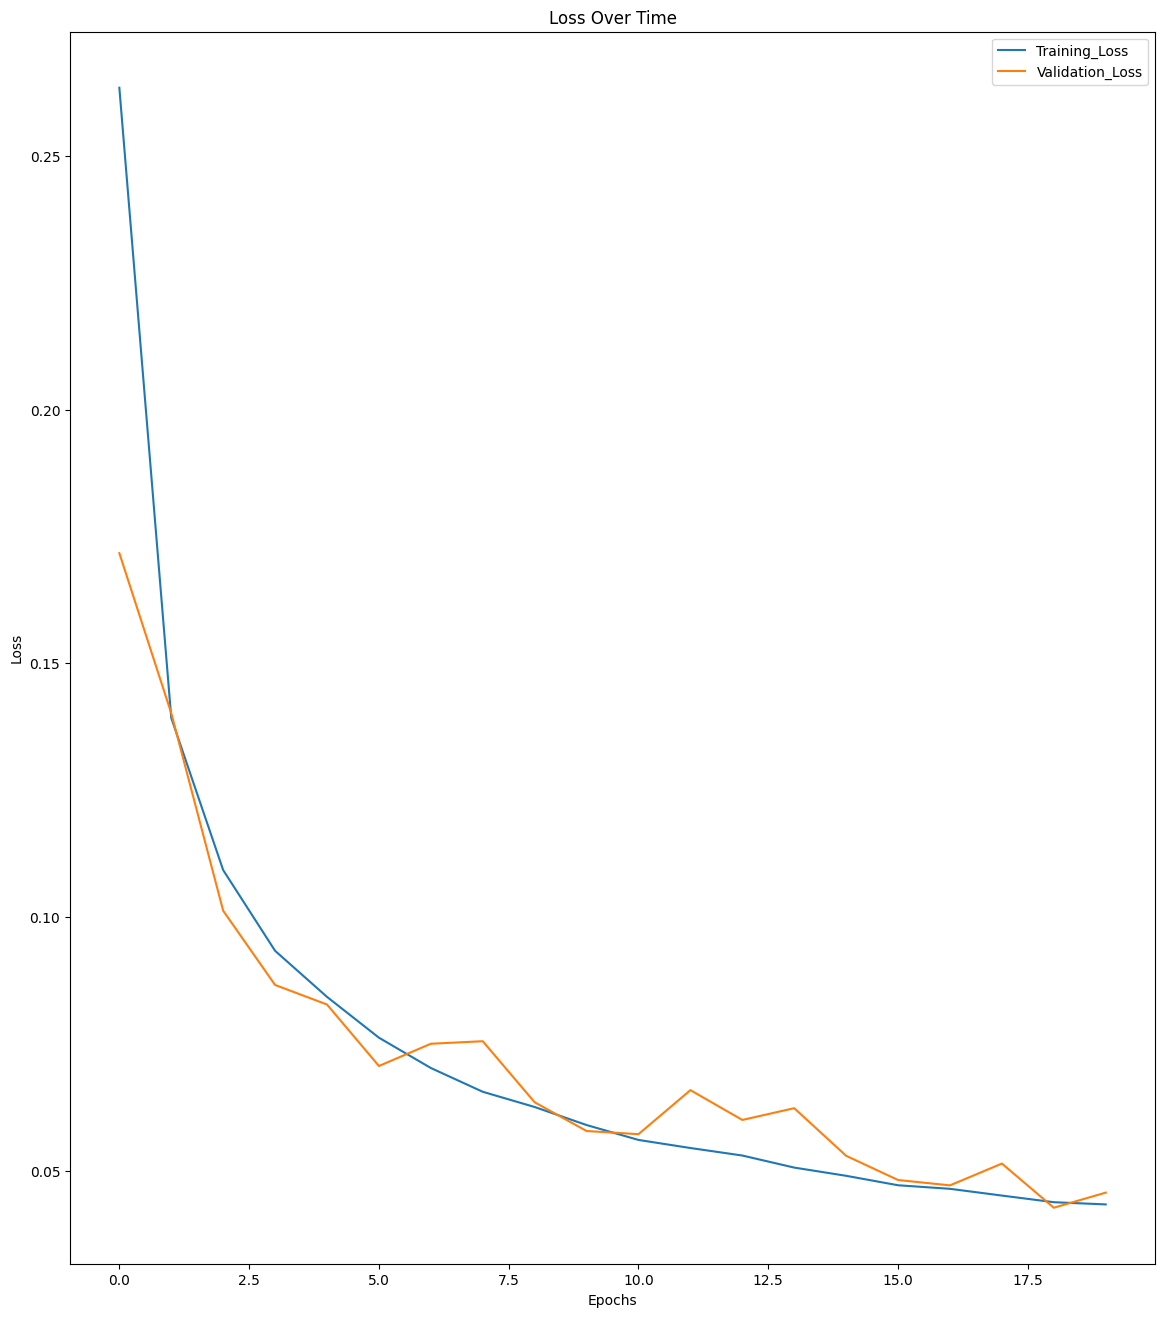

In [175]:
plt.figure(figsize=(14,16))
epochs_range=range(epochs)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs_range,train_loss,label='Training_Loss')
plt.plot(epochs_range,val_loss,label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()


